<a href="https://colab.research.google.com/github/ParishaKB/ML/blob/master/Experiment_7/Experiment_7_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_covtype, fetch_kddcup99, fetch_lfw_pairs, fetch_lfw_people, fetch_olivetti_faces
from sklearn.datasets import fetch_rcv1, load_breast_cancer, load_digits, load_wine

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt

In [3]:
from keras import models
from keras import layers
from keras.utils import to_categorical

Forest Cover

Loading Dataset and Preprocessing

In [4]:
forest = fetch_covtype()
x_fetch_covtype = forest.data
y_fetch_covtype = forest.target

In [5]:
x_forest = pd.DataFrame(x_fetch_covtype)
y_forest = pd.DataFrame(y_fetch_covtype)
print(x_forest.shape)
print(y_forest.shape)

(581012, 54)
(581012, 1)


Making a Neural Network

In [6]:
y_fore = y_forest.replace([1,2,3,4,5,6,7], [0,1,2,3,4,5,6])
y_fore = to_categorical(y_fore)
x_train, x_test, y_train, y_test = train_test_split(x_forest, y_fore, test_size = 0.2)
x_dev, x_test, y_dev, y_test = train_test_split(x_test, y_test, test_size = 0.5)
print(x_train.shape)
print(x_dev.shape)
print(x_test.shape)
print(y_train.shape)
print(y_dev.shape)
print(y_test.shape)

(464809, 54)
(58101, 54)
(58102, 54)
(464809, 7)
(58101, 7)
(58102, 7)


In [7]:
nn_forest = models.Sequential()
nn_forest.add(layers.Dense(512, activation = 'relu', input_shape = (54, )))
nn_forest.add(layers.Dense(256, activation = 'relu'))
nn_forest.add(layers.Dense(128, activation = 'relu'))
nn_forest.add(layers.Dense(54, activation = 'relu'))
nn_forest.add(layers.Dense(7, activation = 'softmax'))
nn_forest.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [8]:
forest_history = nn_forest.fit(x_train, y_train, epochs = 75, batch_size = 5000, validation_data = (x_dev, y_dev))
for_dev_acc = nn_forest.evaluate(x_dev, y_dev)[1]
print('The dev accuracy is',for_dev_acc)

Epoch 1/75
93/93 [==============================] - 1s 8ms/step - loss: 21.2018 - accuracy: 0.4037 - val_loss: 3.1537 - val_accuracy: 0.4131
Epoch 2/75
93/93 [==============================] - 1s 6ms/step - loss: 2.4994 - accuracy: 0.4215 - val_loss: 1.2838 - val_accuracy: 0.4169
Epoch 3/75
93/93 [==============================] - 1s 5ms/step - loss: 1.6987 - accuracy: 0.4470 - val_loss: 1.3092 - val_accuracy: 0.3713
Epoch 4/75
93/93 [==============================] - 1s 6ms/step - loss: 1.3149 - accuracy: 0.4598 - val_loss: 2.2619 - val_accuracy: 0.3715
Epoch 5/75
93/93 [==============================] - 1s 6ms/step - loss: 1.2379 - accuracy: 0.4722 - val_loss: 1.1406 - val_accuracy: 0.4516
Epoch 6/75
93/93 [==============================] - 1s 6ms/step - loss: 1.1737 - accuracy: 0.5005 - val_loss: 1.2953 - val_accuracy: 0.4852
Epoch 7/75
93/93 [==============================] - 1s 5ms/step - loss: 1.0530 - accuracy: 0.5185 - val_loss: 1.1514 - val_accuracy: 0.4863
Epoch 8/75
93/93 [=

Plotting Accuracy & Validation Accuracy with Epoch

Plotting Loss & Validation Loss with Epoch

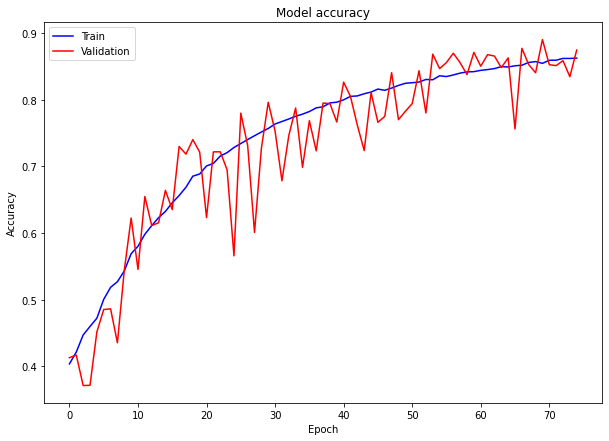

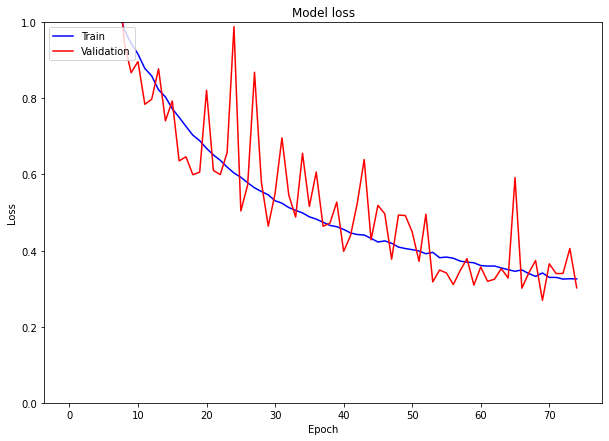

In [9]:
plt.figure(figsize = (10,7))
plt.plot(forest_history.history['accuracy'], color = 'blue')
plt.plot(forest_history.history['val_accuracy'], color = 'red')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.figure(figsize = (10,7))
plt.plot(forest_history.history['loss'], color = 'blue')
plt.plot(forest_history.history['val_loss'], color = 'red')
plt.ylim((0,1))
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [10]:
for_test_acc = nn_forest.evaluate(x_test, y_test)[1]
print('The test accuracy is',for_test_acc)

1816/1816 [==============================] - 3s 2ms/step - loss: 0.3086 - accuracy: 0.8719
The test accuracy is 0.8719149231910706
